<a href="https://colab.research.google.com/github/um4rki/MODUL_4/blob/main/2-amaliy_ish_sun'iy_intellekt!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Kutubxonalarni import qilamiz***

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

***O'quv to'plamlarini(Dataset) yuklash***

In [135]:
data_set = pd.read_excel('mashinahaqida_data_set.xlsx')

In [136]:
data_set

,Mashina nomlari,Tezligi,Yoqilg'i sig'imi,Tezlanish,Turlari,Sinfi
0,Ford F-Series,175,90,9.0,Yuk mashinasi,1
1,Chevrolet Silverado,180,90,9.2,Yuk mashinasi,1
2,Ram 1500,185,80,8.8,Yuk mashinasi,1
3,Toyota Tundra,175,70,9.5,Yuk mashinasi,1
4,GMC Sierra,180,80,9.1,Yuk mashinasi,1
...,...,...,...,...,...,...
75,Volkswagen Beetle,210,60,8.6,Yengil mashina,0
76,Subaru BRZ,230,60,6.3,Yengil mashina,0
77,Mazda CX-3,215,50,8.4,Yengil mashina,0
78,Dodge Neon,200,55,9.7,Yengil mashina,0


***O'quv to'plami(Dataset)ni xususiyatlarini tanlash va sinflarini ajratish***

In [137]:
X = data_set.iloc[:, [1, 2, 3]].values
Y = data_set.iloc[:, 5].values

***O'quv to'plami(Dataset)ni grafik ko'rinishda tasvirlash***

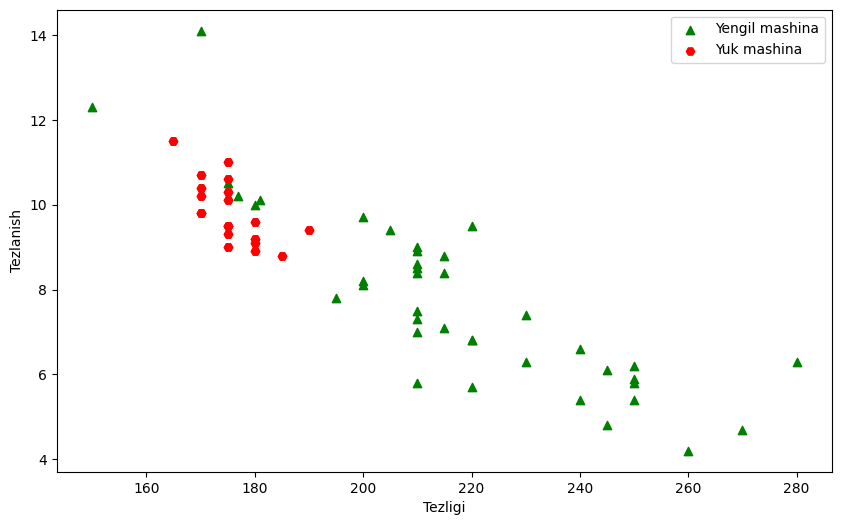

In [139]:
#x1 = X[:, 0]  # Tezlik
#x2 = X[:, 2]  #Tezlanish
X = X[:, [0, 2]]

plt.figure(figsize=(10,6))
plt.xlabel('Tezligi')
plt.ylabel('Tezlanish')
plt.scatter(x1[Y==0], x2[Y==0], marker='^', color='green', label='Yengil mashina')
plt.scatter(x1[Y==1], x2[Y==1], marker='H', color='red', label='Yuk mashina')


plt.legend()
plt.show()

***Datasetni o'quv va test to'plamga ajratamiz***

In [140]:
from sklearn.model_selection import train_test_split

# O'quv va sinov to'plamlarini ajratish
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [141]:
from sklearn.preprocessing import StandardScaler

# StandardScaler obyekti yaratish
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

#**K ta yaqin qo'shnilar algoritmi(KNN - K-nearest neighbors)**

***K ta yaqin qo'shnilar algoritmini o'qitish***

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

***O'quv to'plami uchun model natijasini olish va natijasini tekshirish***

In [143]:
knn_train_pred = knn.predict(X_train)

print(knn_train_pred)

[0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0]


In [144]:
# O'quv(train) to'plam uchun model aniqligi
knn_train_score = knn.score(X_train, y_train)
print("Accuracy (Aniqlik):", knn_train_score)

Accuracy (Aniqlik): 0.9666666666666667


***Test to'plami uchun model natijasini olish va natijasini tekshirish***

In [145]:
# Sinov(test) to'plam uchun model natijasi
knn_test_pred = knn.predict(X_test)
print(knn_test_pred)

[0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1]


In [146]:
# Sinov(test) to'plam uchun model aniqligi
knn_test_score = knn.score(X_test, y_test)
print("Accuracy (Aniqlik):", knn_test_score)

Accuracy (Aniqlik): 0.95


***KNN algoritmining O'quv(train) to'plami uchun qaror chegarasini grafik tasvirlash***

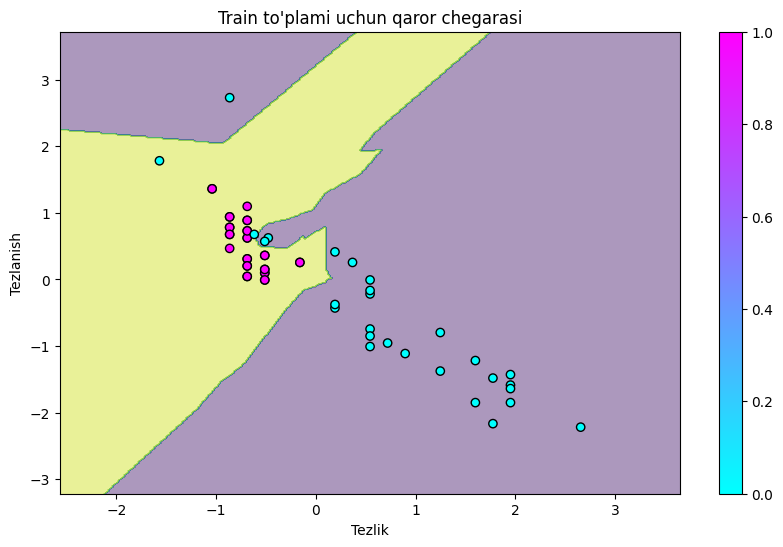

In [147]:
plt.figure(figsize=(10,6))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Qaror chegarasi uchun bashorat qilish
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cool', edgecolor='k')
plt.xlabel('Tezlik')
plt.ylabel('Tezlanish')
plt.title("Train to'plami uchun qaror chegarasi")
plt.colorbar()
plt.show()

***KNN algoritmining Sinov(test) to'plami uchun qaror chegarasini grafik tasvirlash***

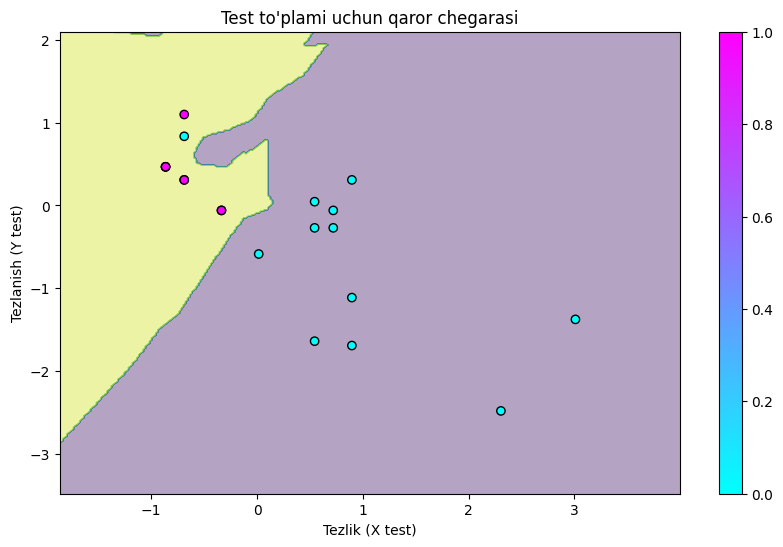

In [148]:
# Qaror chegarasini chizish
plt.figure(figsize=(10, 6))
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Qaror chegarasi uchun bashorat qilish
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_test, cmap='cool', edgecolor='k')
plt.xlabel('Tezlik (X test)')
plt.ylabel('Tezlanish (Y test)')
plt.title("Test to'plami uchun qaror chegarasi")
plt.colorbar()
plt.show()


***KNN algoritmini baholash metrkalari orqali O'quv(Train) to'plami uchun baholash***

In [149]:
from sklearn.metrics import confusion_matrix

knn_train_baholash = confusion_matrix(y_train, knn_train_pred)
print("Chalkashlik matritsasi: ")
print(knn_train_baholash)

Chalkashlik matritsasi: 
[[26  2]
 [ 0 32]]


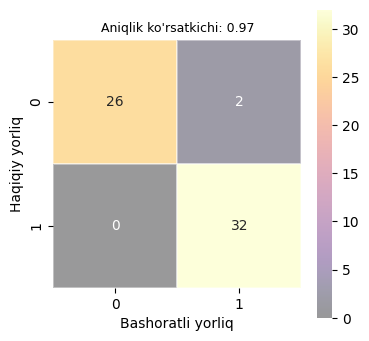

In [150]:
import seaborn as sns

plt.figure(figsize=(4,4))
sns.heatmap(knn_train_baholash, annot=True,
            fmt="d", linewidths=.1, square=True,
            cmap='inferno', alpha=0.4)
plt.ylabel('Haqiqiy yorliq')
plt.xlabel('Bashoratli yorliq')
matritsa = "Aniqlik ko'rsatkichi: {0:.2f}".format(knn_train_score)
plt.title(matritsa, size=9)
plt.show()

In [151]:
from sklearn.metrics import classification_report

knn_train_hisobot = classification_report(y_train,
                                          knn_train_pred)
print("Sinflashtirish hisoboti:",)
print (knn_train_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.94      1.00      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



***KNN algoritmini baholash metrkalari orqali Sinov(Test) to'plami uchun baholash***

In [152]:
knn_test_baholash = confusion_matrix(y_test,
                                     knn_test_pred)
print("Chalkashlik matritsasi: ")
print(knn_test_baholash)

Chalkashlik matritsasi: 
[[11  1]
 [ 0  8]]


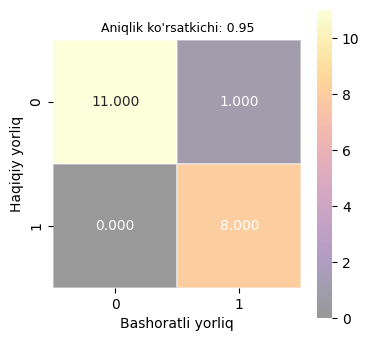

In [153]:
plt.figure(figsize=(4,4))
sns.heatmap(knn_test_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
matritsa = "Aniqlik ko'rsatkichi: {0}".format(knn_test_score)
plt.title(matritsa, size = 9);

In [154]:
knn_test_hisobot = classification_report(y_test, knn_test_pred)
print("Sinflashtirish hisoboti:",)
print (knn_test_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



#**Support vector machine (Tayanch vektorlar usuli) algoritmi**

***SVM - Tayanch vektorlar usuli algoritmini o'qitish***

In [155]:
#  Support vector machine (Tayanch vektorlar usuli) algoritmini o'qitish
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

***O'quv(train) to'plami uchun model natijasini olish va aniqligini tekshirish***

In [156]:
# O'quv(train) to'plam uchun model natijasi
svm_train_pred = svm.predict(X_train)
print(svm_train_pred)

[0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0]


In [157]:
# O'quv(train) to'plam uchun model aniqligi
svm_train_score = svm.score(X_train, y_train)
print("Accuracy (Aniqlik):",svm_train_score)

Accuracy (Aniqlik): 0.9166666666666666


***Sinov(test) to'plami uchun model natijasini olish va aniqligini tekshirish***

In [158]:
# Sinov(test) to'plam uchun model natijasi
svm_test_pred = svm.predict(X_test)
print(svm_test_pred)

[0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1]


In [159]:
# Sinov(test) to'plam uchun model aniqligi
svm_test_score = svm.score(X_test, y_test)
print("Accuracy (Aniqlik):",svm_test_score)

Accuracy (Aniqlik): 0.9


***SVM algoritmining O'quv(train) to'plami uchun qaror chegarasini grafik tasvirlash***

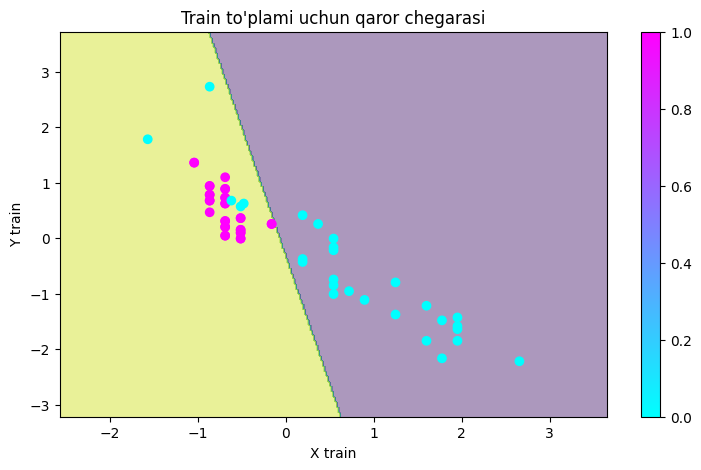

In [160]:
plt.figure(figsize=(30, 5))
plt.subplot(131)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, -1].min() - 1, X_train[:, -1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='cool')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.title("Train to'plami uchun qaror chegarasi")
plt.colorbar()

***SVM algoritmining Sinov(test) to'plami uchun qaror chegarasini grafik tasvirlash***

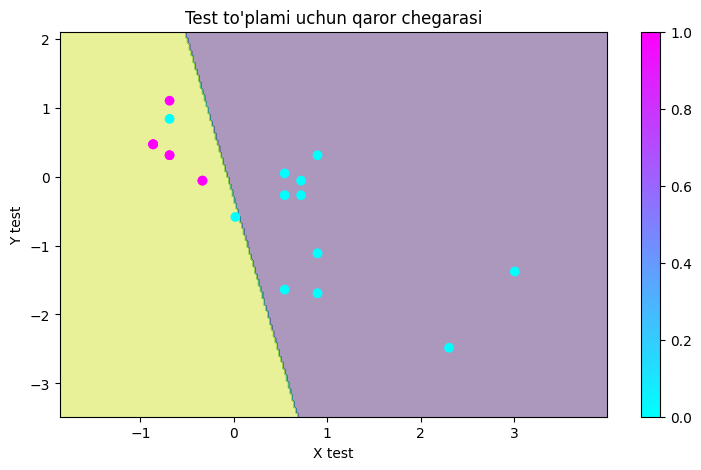

In [161]:
# Qaror chegarasini chizish
plt.figure(figsize=(30, 5))
plt.subplot(131)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, -1].min() - 1, X_test[:, -1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test, cmap='cool')
plt.xlabel('X test')
plt.ylabel('Y test')
plt.title("Test to'plami uchun qaror chegarasi")
plt.colorbar()

***SVM algoritmini baholash metrkalari orqali O'quv(Train) to'plami uchun baholash***

In [163]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [164]:
svm_train_baholash = confusion_matrix(y_train,
                                      svm_train_pred)
print("Chalkashlik matritsasi: ")
print(svm_train_baholash)

Chalkashlik matritsasi: 
[[23  5]
 [ 0 32]]


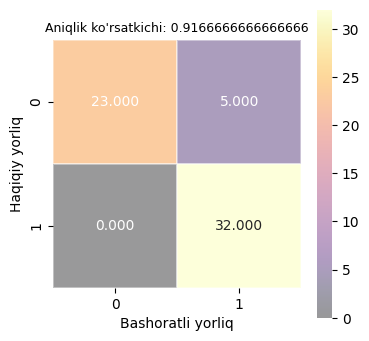

In [165]:
plt.figure(figsize=(4,4))
sns.heatmap(svm_train_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
matritsa = "Aniqlik ko'rsatkichi: {0}".format(svm_train_score)
plt.title(matritsa, size = 9);

In [166]:
svm_train_hisobot = classification_report(y_train,
                                          svm_train_pred)
print("Sinflashtirish hisoboti:",)
print (svm_train_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.86      1.00      0.93        32

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



***SVM algoritmini baholash metrkalari orqali Sinov(Test) to'plami uchun baholash***

In [167]:
svm_test_baholash = confusion_matrix(y_test,
                                     svm_test_pred)
print("Chalkashlik matritsasi: ")
print(svm_test_baholash)

Chalkashlik matritsasi: 
[[10  2]
 [ 0  8]]


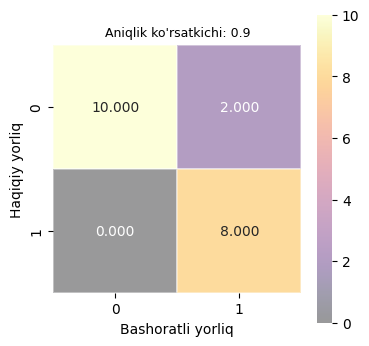

In [168]:
plt.figure(figsize=(4,4))
sns.heatmap(svm_test_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
matritsa = "Aniqlik ko'rsatkichi: {0}".format(svm_test_score)
plt.title(matritsa, size = 9);

In [169]:
svm_test_hisobot = classification_report(y_test,
                                         svm_test_pred)
print("Sinflashtirish hisoboti:")
print (svm_test_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



# **Decision tree (qaror daraxti) algoritmi**

***DT - Qaror daraxti algoritmini o'qitish***

In [170]:
#  Decision tree (qaror daraxti) algoritmini o'qitish
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

***O'quv(train) to'plami uchun model natijasini olish va aniqligini tekshirish***

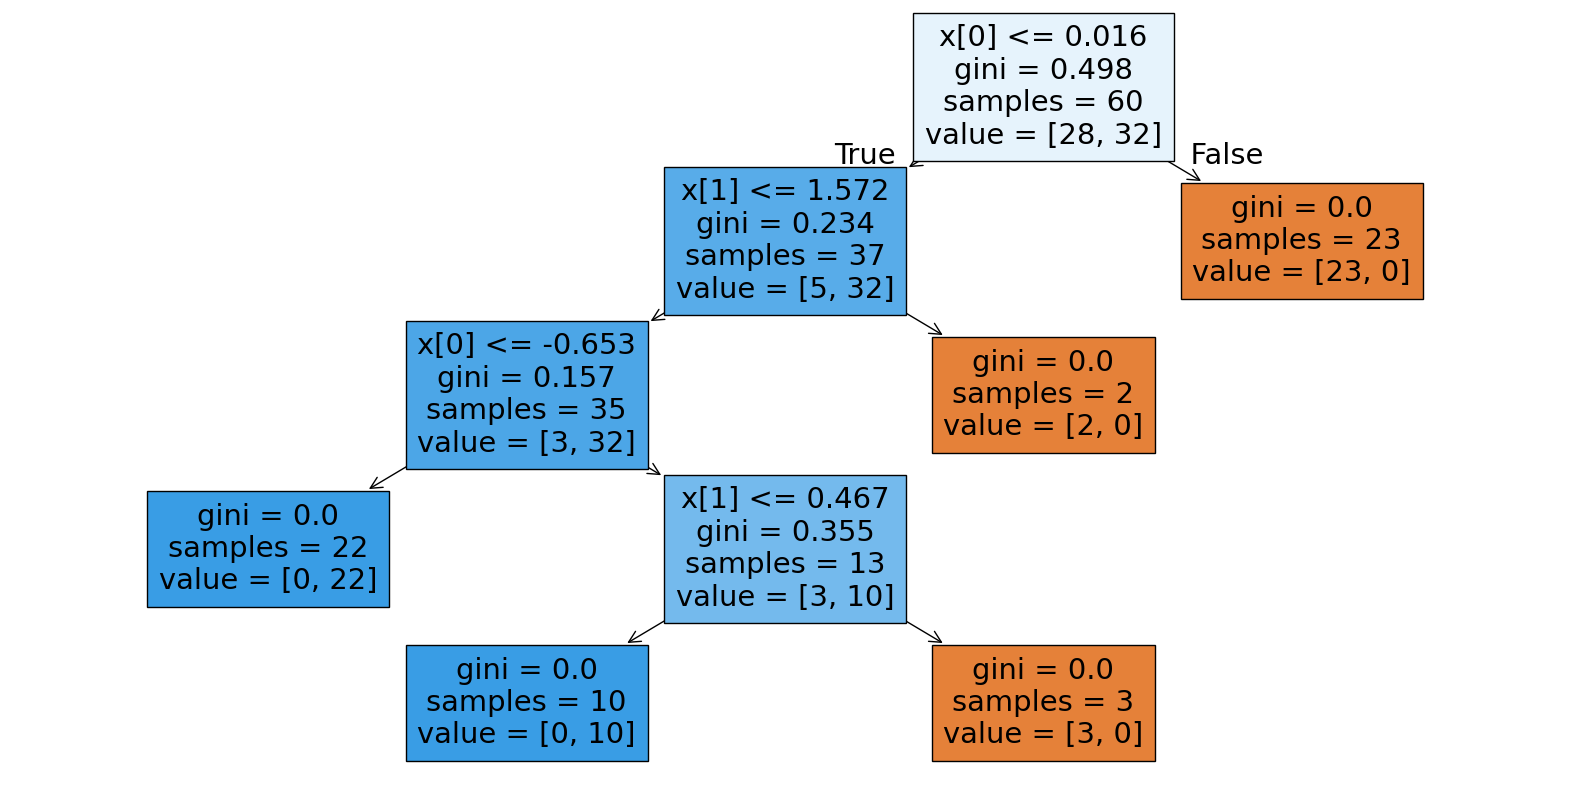

In [171]:
# Daraxtni chizamiz
plt.figure(figsize=(20, 10))  # Grafik o'lchamini sozlaymiz
plot_tree(dt,filled=True)
plt.show()

In [172]:
# O'quv(train) to'plam uchun model natijasi
dt_train_pred = dt.predict(X_train)
print(dt_train_pred)

[0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0]


In [173]:
# O'quv(train) to'plam uchun model aniqligi
dt_train_score = dt.score(X_train, y_train)
print("Accuracy (Aniqlik):", dt_train_score)

Accuracy (Aniqlik): 1.0


***Sinov(test) to'plami uchun model natijasini olish va aniqligini tekshirish***

In [174]:
# O'quv(train) to'plam uchun model natijasi
dt_test_pred = dt.predict(X_test)
print(dt_test_pred)

[0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1]


In [175]:
# O'quv(train) to'plam uchun model aniqligi
dt_test_score = dt.score(X_test, y_test)
print("Accuracy (Aniqlik):", dt_test_score)

Accuracy (Aniqlik): 0.95


***DT algoritmining O'quv(train) to'plami uchun qaror chegarasini grafik tasvirlash***

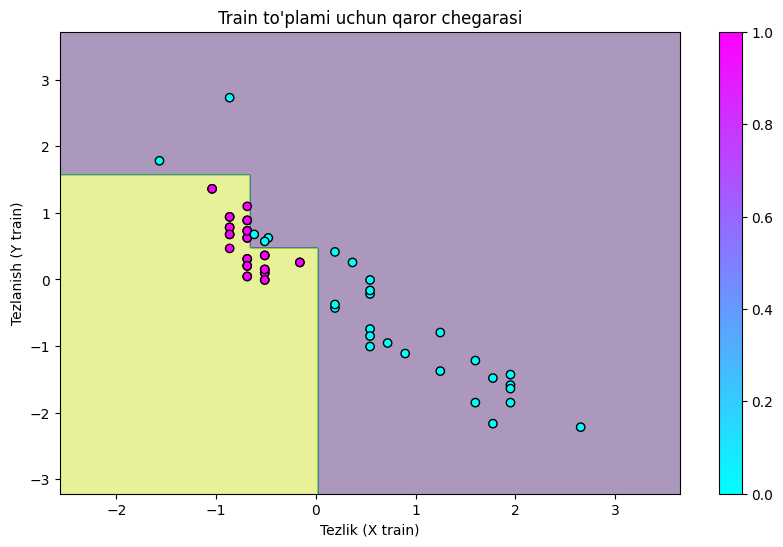

In [176]:
# Qaror chegarasini chizish
plt.figure(figsize=(10, 6))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cool', edgecolor='k')
plt.xlabel('Tezlik (X train)')
plt.ylabel('Tezlanish (Y train)')
plt.title("Train to'plami uchun qaror chegarasi")
plt.colorbar()
plt.show()


***DT algoritmining Sinov(test) to'plami uchun qaror chegarasini***

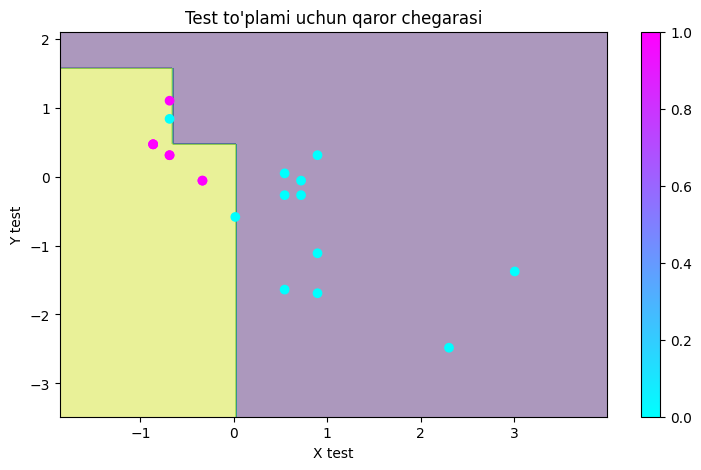

In [182]:
# Qaror chegarasini chizish
plt.figure(figsize=(30, 5))
plt.subplot(131)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, -1].min() - 1, X_test[:, -1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test, cmap='cool')
plt.xlabel('X test')
plt.ylabel('Y test')
plt.title("Test to'plami uchun qaror chegarasi")
plt.colorbar()

***DT algoritmini baholash metrkalari orqali O'quv(Train) to'plami uchun baholash***

In [183]:
dt_train_baholash = confusion_matrix(y_train,
                                     dt_train_pred)
print("Chalkashlik matritsasi: ")
print(dt_train_baholash)

Chalkashlik matritsasi: 
[[28  0]
 [ 0 32]]


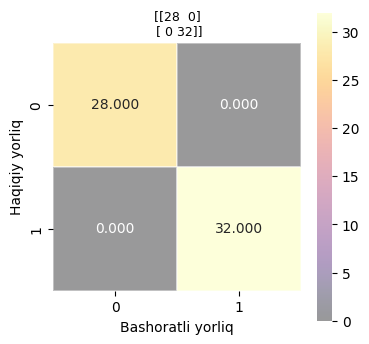

In [184]:
plt.figure(figsize=(4,4))
sns.heatmap(dt_train_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
matritsa = "Aniqlik ko'rsatkichi: {0}".format(dt_train_score)
plt.title(dt_train_baholash, size = 9);

In [185]:
dt_train_hisobot = classification_report(y_train,
                                         dt_train_pred)
print("Sinflashtirish hisoboti:",)
print (dt_train_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        32

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



***DT algoritmini baholash metrkalari orqali Sinov(Test) to'plami uchun baholash***

In [186]:
dt_test_baholash = confusion_matrix(y_test,
                                    dt_test_pred)
print("Chalkashlik matritsasi: ")
print(dt_test_baholash)

Chalkashlik matritsasi: 
[[11  1]
 [ 0  8]]


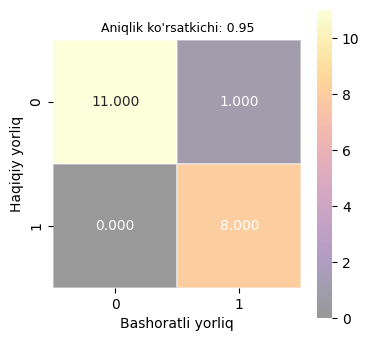

In [188]:
plt.figure(figsize=(4,4))
sns.heatmap(dt_test_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
matritsa = "Aniqlik ko'rsatkichi: {0}".format(dt_test_score)
plt.title(matritsa, size = 9);

In [189]:
dt_test_hisobot = classification_report(y_test,
                                        dt_test_pred)
print("Sinflashtirish hisoboti:")
print (dt_test_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



# **Random forest (Tasodifiy o'rmon) algoritmi**

***RF - Tasodifiy o'rmon algoritmini o'qitish***

In [190]:
#   Random forest (Tasodifiy o'rmon)  algoritmini o'qitish
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

***O'quv(train) to'plami uchun model natijasini olish va aniqligini tekshirish***

In [191]:
# O'quv(train) to'plam uchun model natijasi
rf_train_pred = rf.predict(X_train)
print(rf_train_pred)

[0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0]


In [192]:
# O'quv(train) to'plam uchun model aniqligi
rf_train_score = rf.score(X_train, y_train)
print("Accuracy (Aniqlik):", rf_train_score)

Accuracy (Aniqlik): 1.0


***Sinov(test) to'plami uchun model natijasini olish va aniqligini tekshirish***

In [193]:
# O'quv(train) to'plam uchun model natijasi
rf_test_pred = rf.predict(X_test)
print(rf_test_pred)

[0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1]


In [194]:
# O'quv(train) to'plam uchun model aniqligi
rf_test_score = rf.score(X_test, y_test)
print("Accuracy (Aniqlik):", rf_test_score)

Accuracy (Aniqlik): 0.95


***RF algoritmining O'quv(train) to'plami uchun qaror chegarasini grafik tasvirlash***

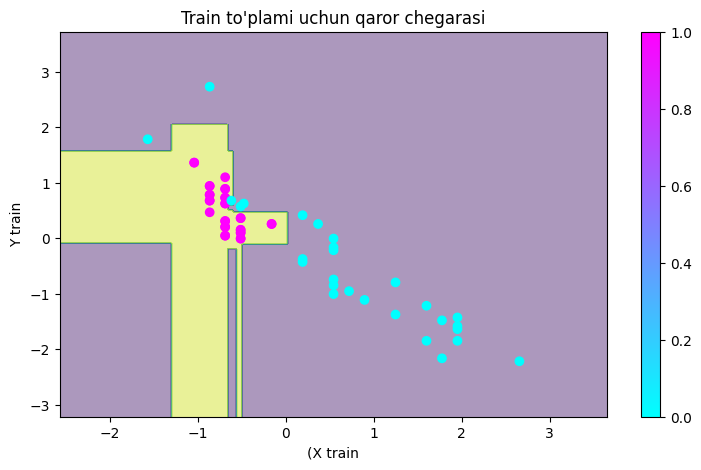

In [195]:
# Qaror chegarasini chizish
plt.figure(figsize=(30, 5))
plt.subplot(131)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, -1].min() - 1, X_train[:, -1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='cool')
plt.xlabel('(X train')
plt.ylabel('Y train')
plt.title("Train to'plami uchun qaror chegarasi")
plt.colorbar()

***RF algoritmining Sinov(test) to'plami uchun qaror chegarasini grafik tasvirlash***

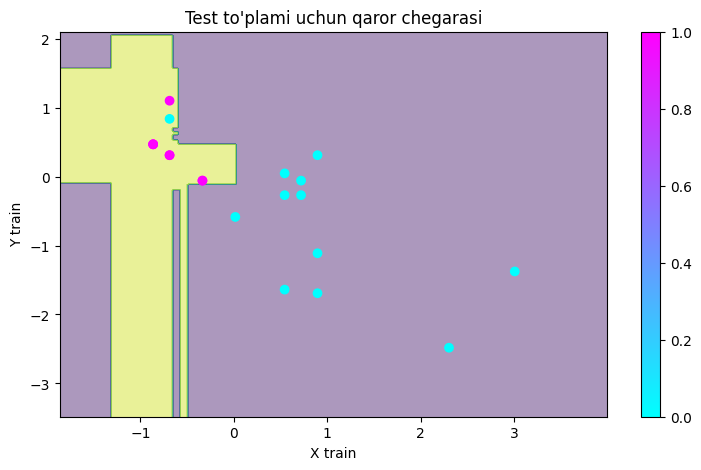

In [196]:
# Qaror chegarasini chizish
plt.figure(figsize=(30, 5))
plt.subplot(131)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, -1].min() - 1, X_test[:, -1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test, cmap='cool')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.title('Test to\'plami uchun qaror chegarasi')
plt.colorbar()

***RF algoritmini baholash metrkalari orqali O'quv(Train) to'plami uchun baholash***

In [197]:
rf_train_baholash = confusion_matrix(y_train,
                                     rf_train_pred)
print("Chalkashlik matritsasi: ")
print(rf_train_baholash)

Chalkashlik matritsasi: 
[[28  0]
 [ 0 32]]


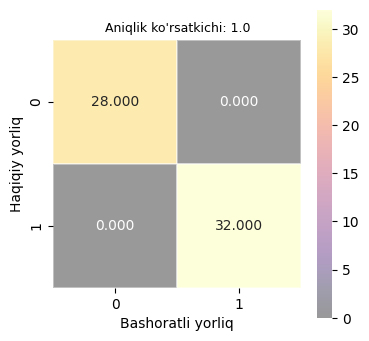

In [198]:
plt.figure(figsize=(4,4))
sns.heatmap(rf_train_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
all_sample_title = "Aniqlik ko'rsatkichi: {0}".format(rf_train_score)
plt.title(all_sample_title, size = 9);

In [203]:
rf_train_hisobot = classification_report(y_train,
                                         rf_train_pred)
print("Sinflashtirish hisoboti:",)
print (rf_train_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        32

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



***RF algoritmini baholash metrkalari orqali Sinov(Test) to'plami uchun baholash***

In [200]:
rf_test_baholash = confusion_matrix(y_test, rf_test_pred)
print("Chalkashlik matritsasi: ")
print(rf_test_baholash)

Chalkashlik matritsasi: 
[[11  1]
 [ 0  8]]


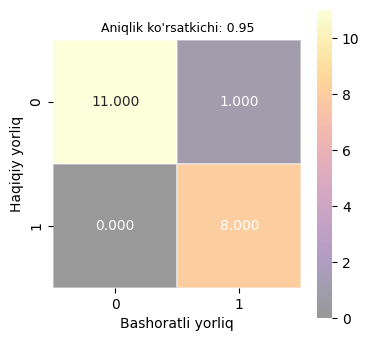

In [201]:
plt.figure(figsize=(4,4))
sns.heatmap(rf_test_baholash, annot=True,
            fmt=".3f", linewidths=.1, square = True,
            cmap = 'inferno', alpha = 0.4);
plt.ylabel('Haqiqiy yorliq');
plt.xlabel('Bashoratli yorliq');
matritsa = "Aniqlik ko'rsatkichi: {0}".format(rf_test_score)
plt.title(matritsa, size = 9);

In [202]:
rf_test_hisobot = classification_report(y_test, rf_test_pred)
print("Sinflashtirish hisoboti:",)
print (rf_test_hisobot)

Sinflashtirish hisoboti:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



# ***Sinflashtirish algoritmlari natijalarini baholash***

***Sinflashtirish algoritmlarning O'quv(train) natijalarining solishtirma grafigi***

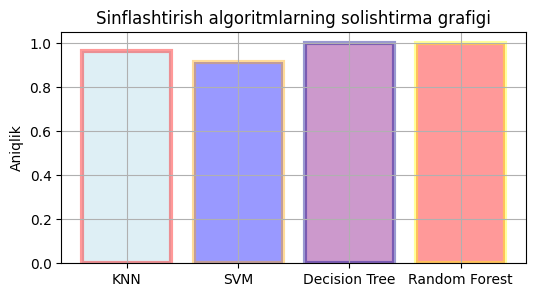

In [204]:
plt.figure(figsize=(6,3))
plt.title('Sinflashtirish algoritmlarning solishtirma grafigi')
color = ['lightblue', 'blue', 'purple', 'red']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']
plt.bar(['KNN','SVM','Decision Tree','Random Forest'],
 [knn_train_score,svm_train_score,dt_train_score,rf_train_score],
        color=color,edgecolor=edgecolor,  linewidth=3, alpha = 0.4)
plt.ylabel("Aniqlik")
plt.grid()
plt.show()

***Sinflashtirish algoritmlarning Sinov(test) natijalarining solishtirma grafigi***

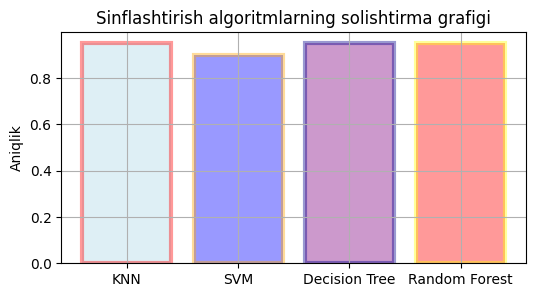

In [207]:
plt.figure(figsize=(6,3))
plt.title('Sinflashtirish algoritmlarning solishtirma grafigi')
color = ['lightblue', 'blue', 'purple', 'red']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']
plt.bar(['KNN','SVM','Decision Tree','Random Forest'],
 [knn_test_score,svm_test_score,dt_test_score,rf_test_score],
  color=color, edgecolor=edgecolor,  linewidth=3, alpha = 0.4)
plt.ylabel("Aniqlik")
plt.grid()
plt.show()

**Baholash metrkalarining hisoblash formulalari**

In [206]:
y_true = y_test  # Haqiqiy sinflar (sinov to'plami)
y_pred = knn.predict(X_test)  # Modelning bashoratlari (test to'plami uchun)

# Chalkashlik matritsasini hisoblash
cm = confusion_matrix(y_true, y_pred)
print("Chalkashlik matritsasi:\n", cm)

# Precision, Recall, F1-Score va Accuracy hisoblash
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")


Chalkashlik matritsasi:
 [[11  1]
 [ 0  8]]
Precision: 0.889
Recall: 1.000
F1-Score: 0.941
Accuracy: 0.950
